In [3]:
import scipy.integrate
import numpy as np
import pandas as pd

In [2]:
R0 = 2.20 #Reproduction number
D_incubation =  5.2 #Length of incubation period
D_infectious =  2.9 # Duration patient is infectious
population = 1250000000

def model(y, t):
    # :param array y: S E I R values
    # :param array t: Time array (days)
    
    N = population
    beta = R0 / D_infectious
    sigma = 1 / D_incubation
    gamma = 1 / D_infectious
    
    S, E, I, R = y
    
    dS = -beta * S * I / N
    dE = beta * S * I / N - sigma * E
    dI = sigma * E - gamma * I
    dR = gamma * I

    return ([dS, dE, dI, dR])

In [4]:
def solve(model, population, E0):
    T = np.arange(365)
    Y0 = population - E0, E0, 0, 0 # S, E, I, R at initial step

    y_data_var = scipy.integrate.odeint(model, Y0, T)
    S, E, I, R = y_data_var.T  # transpose and unpack
    return T, S, E, I, R

In [6]:
X, S, E, I, R = solve(model, population, 3)
i_peak = np.amax(I)
day = np.where(i_peak == I)
print(day, i_peak)

(array([166]),) 82875169.36527164


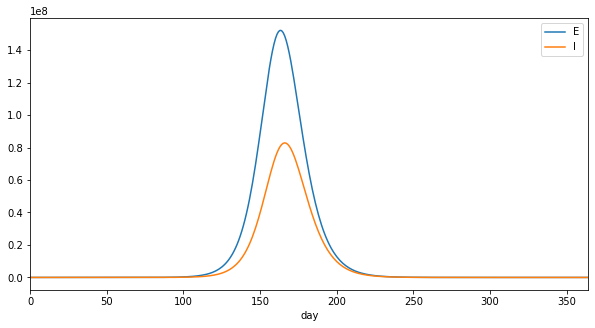

In [8]:
r = pd.DataFrame({
    "day": X,
    "S": S,
    "E": E,
    "I": I,
    "R": R
})
r.plot(
    x = "day",
    y = ["E", "I"],
    figsize = (10, 5)
)